In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
score_card = pd.read_excel("No Nulls.xlsx", sheet_name="Sheet2")

In [13]:
# Load the map of Europe. This includes countries' geometries.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[world['continent'] == 'Europe']

C:\Users\gusta\AppData\Local\Temp\ipykernel_6452\4056184098.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


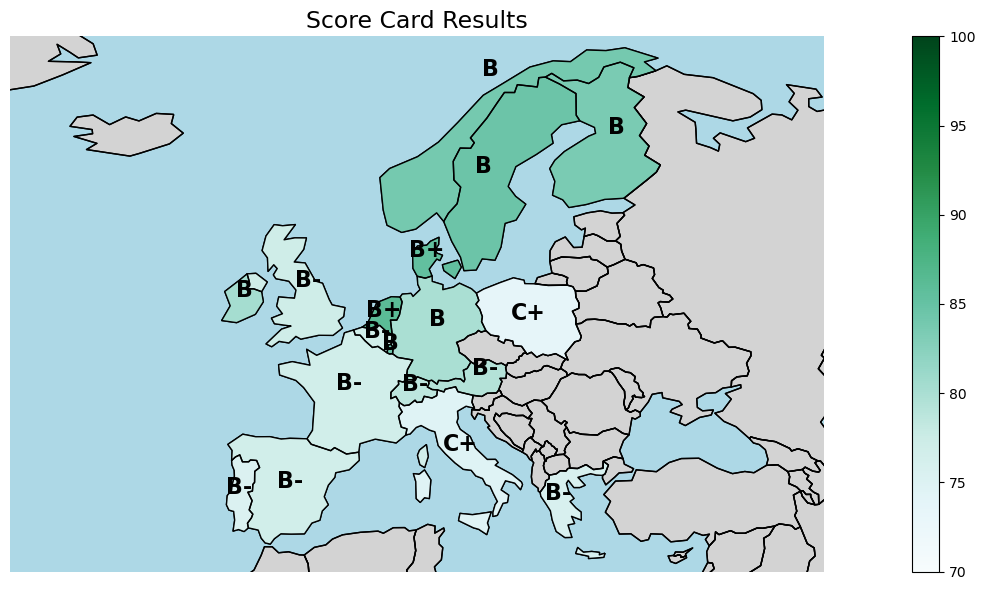

In [58]:
merged_gdf = world.merge(score_card, left_on='name', right_on='Country')

fig, ax = plt.subplots(1, 1, figsize=(18, 6))

# Set the ocean color to light blue
ax.set_facecolor('lightblue')

# Plot all countries with a light grey color to represent those without data
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot all countries with borderlines
world.boundary.plot(ax=ax, linewidth=1, color='black')

# Plot the chloropleth for countries in your DataFrame
merged_gdf.plot(column='Score', ax=ax, legend=True, cmap='BuGn', vmin=70, vmax=100)

# Focus only on Europe
ax.set_xlim(-30, 47)  # Longitude limits
ax.set_ylim(34, 72)   # Latitude limits
plt.title("Score Card Results", fontsize=17)

# Remove plot border (spine) around the chloropleth map
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Hide the x and y-axis
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)

# Add labels for each country in the merged_gdf
for idx, row in merged_gdf.iterrows():
    # Only add labels if the geometry is not empty (i.e., there is a polygon to plot)
    if not row['geometry'].is_empty:
        if row['Country'] != 'Norway':
            x, y = row['geometry'].representative_point().coords.xy
        else:
            # For Norway, manually set a point or use a centroid within a specific part of the country
            # This example assumes you can determine the coordinates empirically
            x, y = row['geometry'].centroid.coords.xy
        # The label will include the country name and grade, separated by a newline
        ax.text(x[0], y[0], row['Grade'], ha='center', fontsize=16, fontweight='bold')

plt.tight_layout()

plt.show()